In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")


In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [35]:
df.shape

(103, 7)

# Data Cleaning

In [37]:
df["Production (Tons)"]= df["Production (Tons)"].str.replace(".","" )
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace(".","" )
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace(".","" ).str.replace(",","" )
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","" ).str.replace(",","" )

In [44]:
df.rename(columns = {"Production (Tons)":"Production(Tons)"} , inplace = True)
df.rename(columns = {"Acreage (Hectare)":"Acreage(Hectare)"} , inplace = True)
df.rename(columns = {"Production per Person (Kg)":"Production_per_Person(Kg)"} , inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"} , inplace = True)


# check if it contains null values

In [51]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [67]:
df[df["Acreage(Hectare)"].isnull()]

,level_0,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)


In [63]:
df = df.dropna()

In [65]:
df

,level_0,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,1,1,India,Asia,348448000,260721,4950000,703935
2,2,2,2,China,Asia,123059739,88287,1675215,734591
3,3,3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...,...
97,97,97,97,Spain,Europe,394,8,9,435965
98,98,98,98,Lebanon,Asia,97,16,3,283864
99,99,100,100,Singapore,Asia,50,9,2,25
100,100,101,101,Samoa,Oceania,12,6,1,119498


In [73]:
df.drop(["level_0", "index","Unnamed: 0"],axis = 1  , inplace = True)

In [75]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,435965
98,Lebanon,Asia,97,16,3,283864
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,119498


# type conversion

In [81]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [83]:
df["Production(Tons)"]= df["Production(Tons)"].astype(float)
df["Acreage(Hectare)"]= df["Acreage(Hectare)"].astype(float)
df["Production_per_Person(Kg)"]= df["Production_per_Person(Kg)"].astype(float)
df["Yield(Kg/Hectare)"]= df["Yield(Kg/Hectare)"].astype(float)

In [87]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [90]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# UNivariate analysis

#### how many countries are there in each continent?

In [97]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

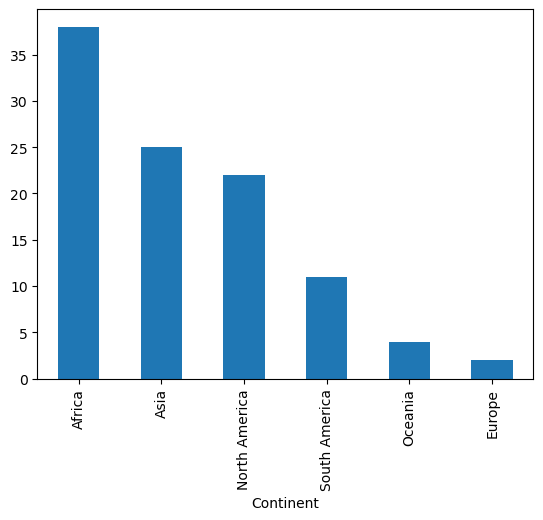

In [99]:
df["Continent"].value_counts().plot(kind = "bar")

C:\Users\aman1\AppData\Local\Temp\ipykernel_12168\4095647584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\aman1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman1\AppData\Local\Temp\ipykernel_12168\4095647584.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

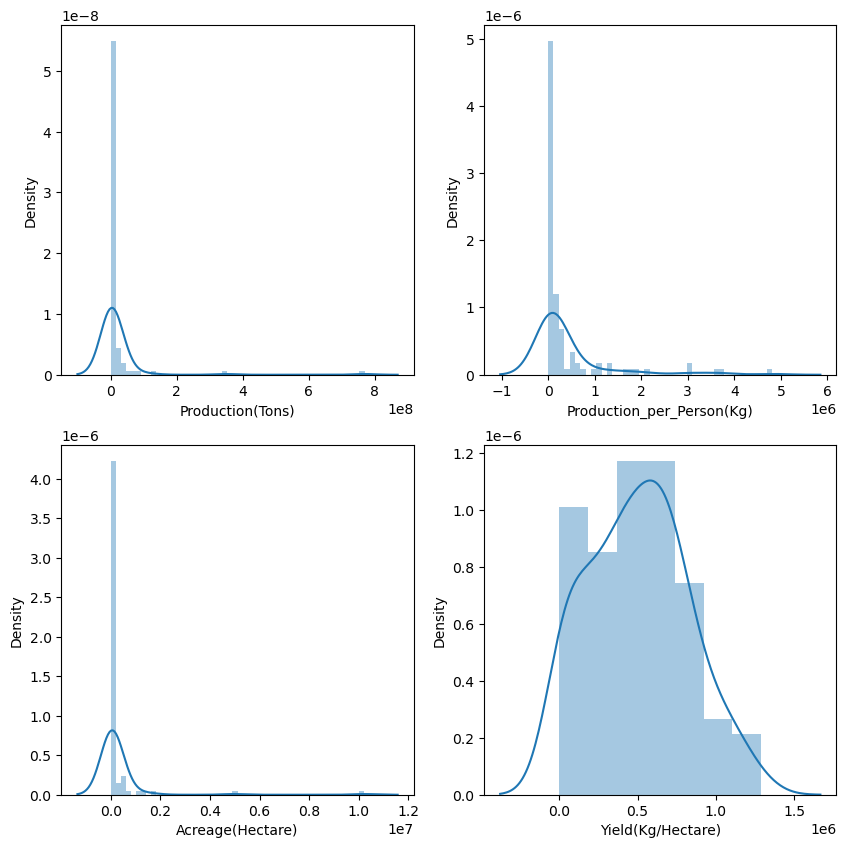

In [113]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])


In [103]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


<Axes: >

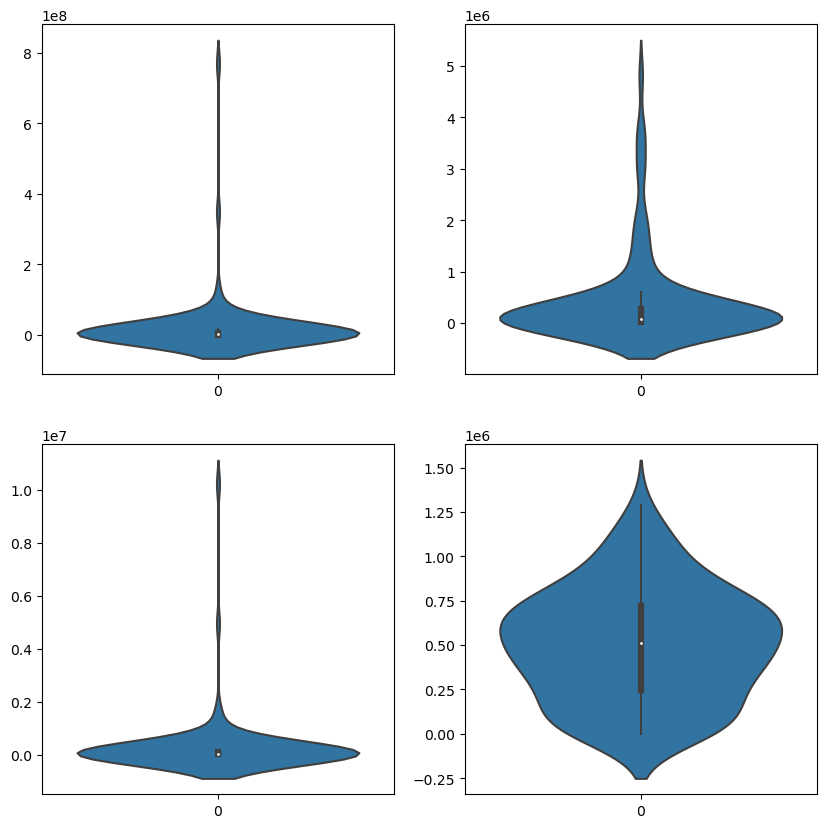

In [115]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.violinplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.violinplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.violinplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.violinplot(df["Yield(Kg/Hectare)"])

<Axes: >

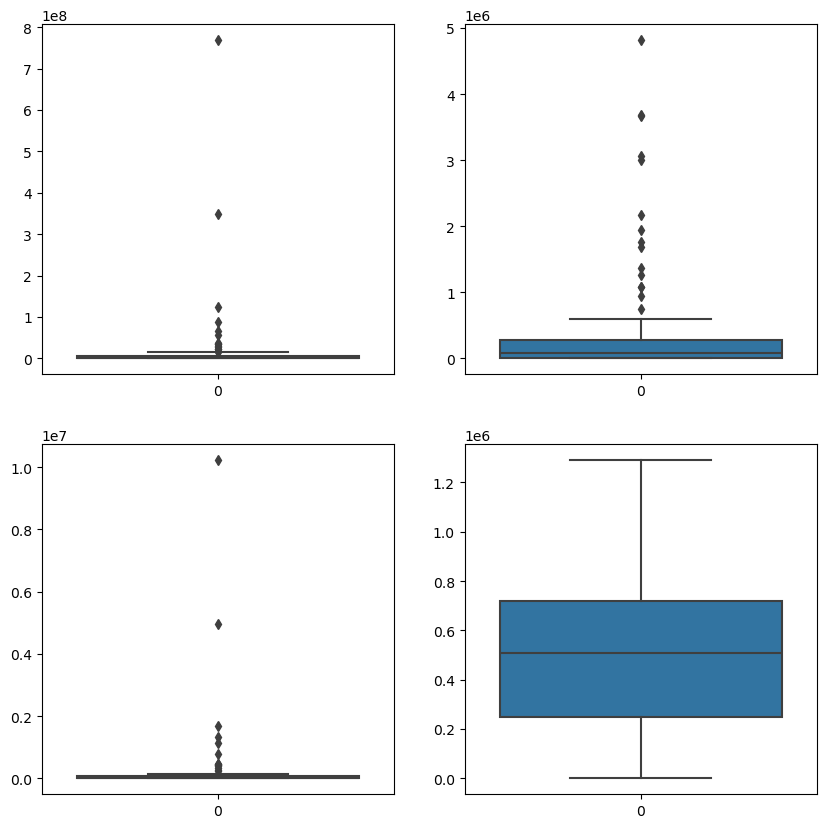

In [117]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [130]:
df.describe()
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


### which country produces the maximum sugarcane?

In [146]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [152]:
df["production_percentage"] = df["Production(Tons)"]*100/df["Production(Tons)"].sum()

<Axes: ylabel='production_percentage'>

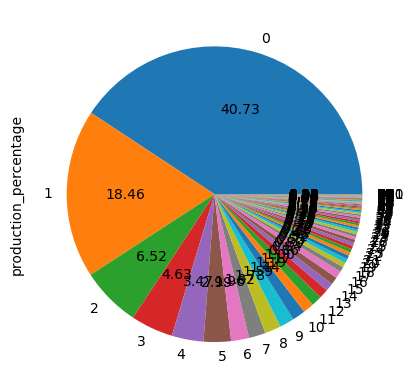

In [158]:
df["production_percentage"].plot(kind = "pie",autopct = "%.2f")

<Axes: xlabel='Country'>

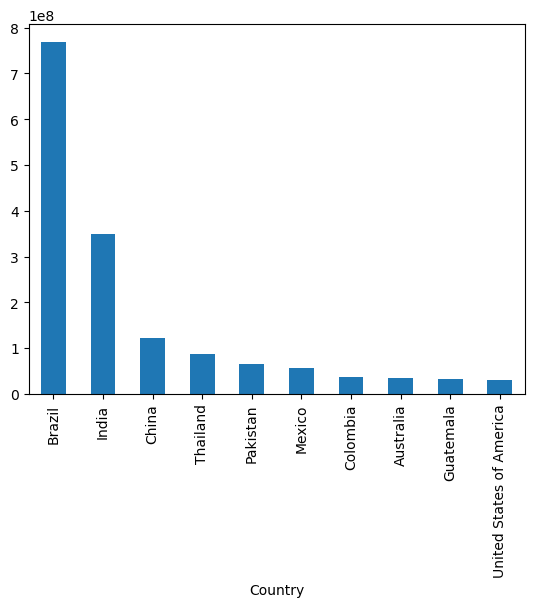

In [162]:
df_new["Production(Tons)"].head(10).plot(kind = "bar")

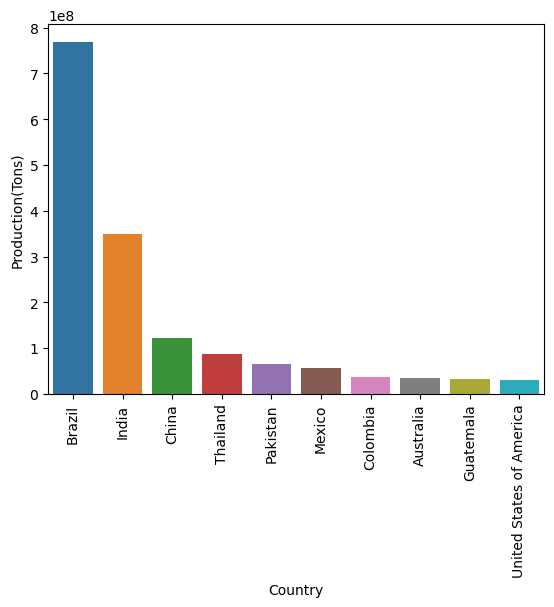

In [176]:
ax = sns.barplot(data = df.head(10) , x = "Country",y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

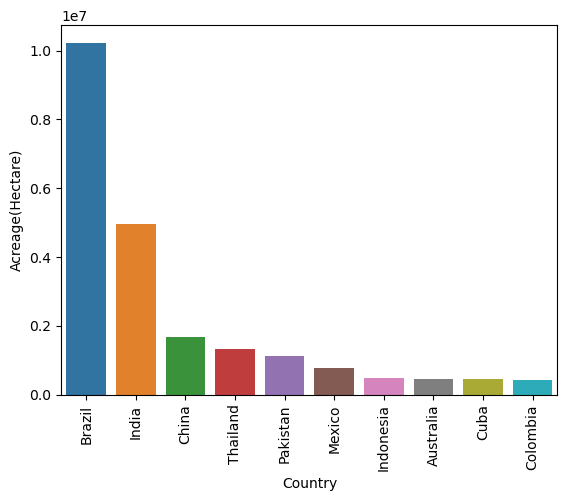

In [184]:
df_acre = df.sort_values("Acreage(Hectare)", ascending = False)
ax = sns.barplot(data = df_acre.head(10), x = "Country" , y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [206]:
dp = df.iloc[:,2:]
dp.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),production_percentage
Production(Tons),1.000000,0.352369,0.997550,0.121125,1.000000
Production_per_Person(Kg),0.352369,1.000000,0.341974,0.226719,0.352369
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826,0.997550
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000,0.121125
production_percentage,1.000000,0.352369,0.997550,0.121125,1.000000


<Axes: >

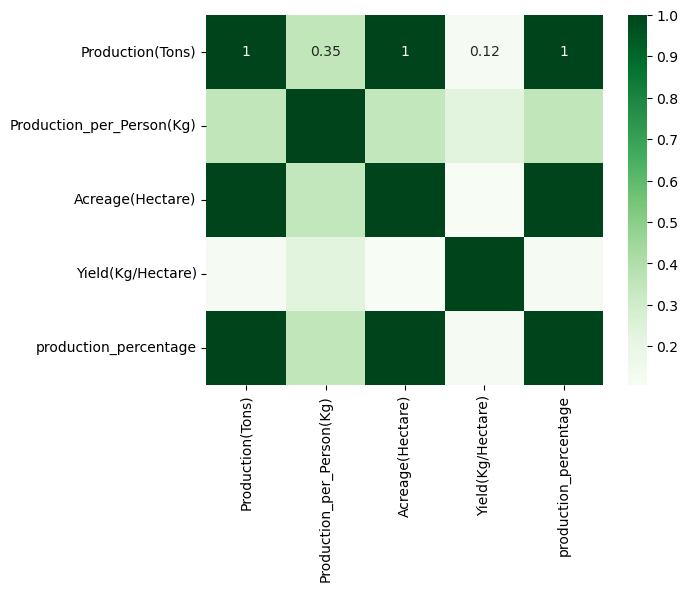

In [212]:
sns.heatmap(dp.corr(), annot = True , cmap ="Greens")

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

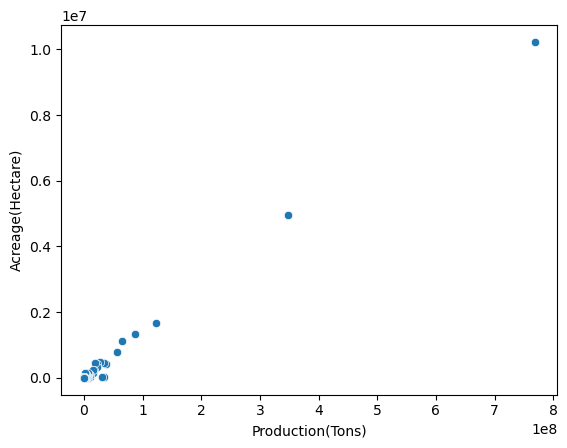

In [214]:
sns.scatterplot(data = dp , x = "Production(Tons)" , y = "Acreage(Hectare)")
      

In [238]:
df_continent = df.groupby("Continent").sum()
df_continent.iloc[:,[1,2,3,4]]

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,10144110.0,1439089.0,20700454.0
Asia,721930425.0,3120808.0,10608319.0,11197308.0
Europe,5823.0,536.0,71.0,1318709.0
North America,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,36177574.0,3158066.0,490909.0,1624191.0
South America,865588126.0,10228540.0,11369236.0,6766896.0


In [248]:
df_cont = df.groupby("Continent").count()["Country"]
df_cont
df_continent["country_count"] = df_cont  
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),production_percentage,country_count
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0,4.751640,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0,38.250414,25
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0,0.000309,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0,9.218918,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0,1.916815,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0,45.861905,11


C:\Users\aman1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


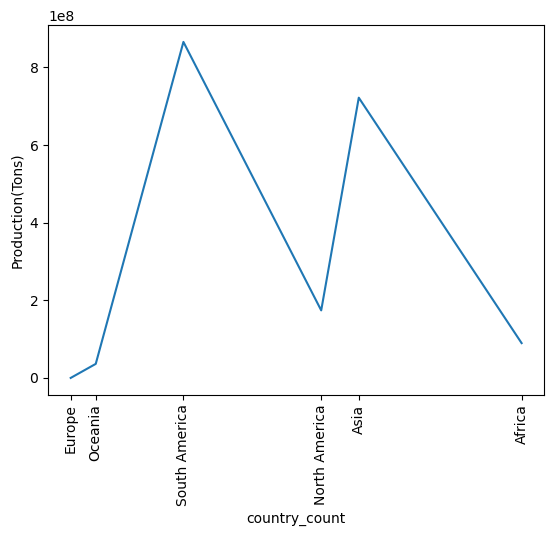

In [270]:
continents = df_continent.index.tolist()
sns.lineplot(data = df_continent ,  x = "country_count", y = "Production(Tons)")
plt.xticks(df_continent["country_count"],continents ,rotation = 90)
plt.show()